# Cab Investment Firm


## Insight

#### The Client
XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.


#### Data Set:

There is 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

###### Cab_Data.csv
    – Transaction ID : ID of each transaction
    - Date of Travel : date of the transaction
    - Company        : company (Pink cab/Yellow cab)
    - City           : city the transaction took place
    - KM Travelled   : distance travelled in KM
    - Price Charged  : price of the transaction
    - Cost of Trip   : maintenance cost/fees of the transaction
    
###### City.csv
    - City           : city names (all in USA)
    - Population     : population of the city
    - Users          : amount of users in the city

###### Customer_ID.csv
    - Costumer ID    : ID of each costumer
    - Gender         : gender of the costumer
    - Age            : age of the costumer
    - Income         : income of the costumer in USD per month

###### Transaction_ID.csv
    - Transaction_ID : ID of each transaction
    - Costumer ID    : ID of each costumer
    - Payment Mode   : payment method (Cash/Card)



## Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
import xlrd
from datetime import datetime

# Standerize the Size of the Plots
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.set_option('display.max_rows', 15)

## Read data

In [2]:
df_cab_data = pd.read_csv(r'Data_sets/Cab_Data.csv')
df_city = pd.read_csv(r'Data_sets/CIty.csv')
df_customer_id = pd.read_csv(r'Data_sets/Customer_ID.csv')
df_transaction_id = pd.read_csv(r'Data_sets/Transaction_ID.csv')

In [3]:
df_cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
df_customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
df_transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


### Shape of each Dataframe

In [7]:
print('Cab_Data.csv has {} rows and {} columns'.format(df_cab_data.shape[0], df_cab_data.shape[1]))
print('City.csv has {} rows and {} columns'.format(df_city.shape[0], df_city.shape[1]))
print('Customer_ID.csv has {} rows and {} columns'.format(df_customer_id.shape[0], df_customer_id.shape[1]))
print('Transaction_ID.csv has {} rows and {} columns'.format(df_transaction_id.shape[0], df_transaction_id.shape[1]))

Cab_Data.csv has 359392 rows and 7 columns
City.csv has 20 rows and 3 columns
Customer_ID.csv has 49171 rows and 4 columns
Transaction_ID.csv has 440098 rows and 3 columns


### Info of each Dataframe

In [8]:
print(df_cab_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None


In [9]:
print(df_city.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None


In [10]:
print(df_customer_id.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [11]:
print(df_transaction_id.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None


## Data Cleaning
### Check for missing data

In [12]:
for col in df_cab_data.columns:
    missing_percent = np.mean(df_cab_data[col].isnull())
    print('{} column is missing {}% data'.format(col, missing_percent))

Transaction ID column is missing 0.0% data
Date of Travel column is missing 0.0% data
Company column is missing 0.0% data
City column is missing 0.0% data
KM Travelled column is missing 0.0% data
Price Charged column is missing 0.0% data
Cost of Trip column is missing 0.0% data


In [13]:
for col in df_city.columns:
    missing_percent = np.mean(df_city[col].isnull())
    print('{} column is missing {}% data'.format(col, missing_percent))

City column is missing 0.0% data
Population column is missing 0.0% data
Users column is missing 0.0% data


In [14]:
for col in df_customer_id.columns:
    missing_percent = np.mean(df_customer_id[col].isnull())
    print('{} column is missing {}% data'.format(col, missing_percent))

Customer ID column is missing 0.0% data
Gender column is missing 0.0% data
Age column is missing 0.0% data
Income (USD/Month) column is missing 0.0% data


In [15]:
for col in df_transaction_id.columns:
    missing_percent = np.mean(df_transaction_id[col].isnull())
    print('{} column is missing {}% data'.format(col, missing_percent))

Transaction ID column is missing 0.0% data
Customer ID column is missing 0.0% data
Payment_Mode column is missing 0.0% data


### Drop any duplicates

In [16]:
df_cab_data = df_cab_data.drop_duplicates()
df_city = df_city.drop_duplicates()
df_customer_id = df_customer_id.drop_duplicates()
df_transaction_id = df_transaction_id.drop_duplicates()

### Format column titles

In [17]:
df_cab_data.columns = df_cab_data.columns.str.replace(' ','_')
df_city.columns = df_city.columns.str.replace(' ','_')
df_customer_id.columns = df_customer_id.columns.str.replace(' ','_')
df_transaction_id.columns = df_transaction_id.columns.str.replace(' ','_')

# removed USD/Month from the column name
df_customer_id = df_customer_id.rename(columns = {'Income_(USD/Month)':'Income'})

### Format String Numbers into Int

In [18]:
df_city['Population'] = df_city['Population'].str.replace(',', '').astype(int)
df_city['Users'] = df_city['Users'].str.replace(',', '').astype(int)
df_city

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
...,...,...,...
15,SACRAMENTO CA,545776,7044
16,PITTSBURGH PA,542085,3643
17,WASHINGTON DC,418859,127001
18,NASHVILLE TN,327225,9270


### Format date

In [19]:
year = []
month = []
day = []

for i in df_cab_data["Date_of_Travel"]:
    date = xlrd.xldate.xldate_as_datetime(i,0).date()
    year.append(date.year)
    month.append(date.month)
    day.append(date.day)

df_cab_data["Year"] = year
df_cab_data["Month"] = month
df_cab_data["Day"] = day

# drop the xlrd date
df_cab_data.drop('Date_of_Travel', axis=1, inplace=True)

### Format Decimal Places

In [20]:
df_cab_data['KM_Travelled'] = df_cab_data['KM_Travelled'].round(decimals = 2)
df_cab_data['Price_Charged'] = df_cab_data['Price_Charged'].round(decimals = 2)
df_cab_data['Cost_of_Trip'] = df_cab_data['Cost_of_Trip'].round(decimals = 2)

In [21]:
df_cab_data

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Day
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.64,2016,1,8
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.85,2016,1,6
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.63,2016,1,2
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.60,2016,1,7
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.78,2016,1,3
...,...,...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,2018,1,8
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,2018,1,4
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,2018,1,5
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,2018,1,5


### Add Profit Column

In [22]:
df_cab_data["Profit"] = df_cab_data["Price_Charged"] - df_cab_data["Cost_of_Trip"]
df_cab_data

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Day,Profit
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.64,2016,1,8,57.31
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.85,2016,1,6,23.67
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.63,2016,1,2,27.57
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.60,2016,1,7,25.80
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.78,2016,1,3,16.84
...,...,...,...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,2018,1,8,5.88
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,2018,1,4,6.90
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,2018,1,5,87.42
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,2018,1,5,32.14


### Seperate Cab Company

In [23]:
df_pink_cab = df_cab_data[df_cab_data['Company'] == "Pink Cab"]
df_pink_cab

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Day,Profit
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.64,2016,1,8,57.31
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.85,2016,1,6,23.67
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.63,2016,1,2,27.57
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.60,2016,1,7,25.80
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.78,2016,1,3,16.84
...,...,...,...,...,...,...,...,...,...,...
357449,10437610,Pink Cab,WASHINGTON DC,13.56,184.19,135.60,2018,1,6,48.59
357450,10437611,Pink Cab,WASHINGTON DC,29.68,388.08,302.74,2018,12,31,85.34
357451,10437612,Pink Cab,WASHINGTON DC,28.50,369.04,310.65,2018,1,7,58.39
357452,10437614,Pink Cab,WASHINGTON DC,16.10,194.17,162.61,2018,1,2,31.56


In [24]:
df_yellow_cab = df_cab_data[df_cab_data['Company'] == "Yellow Cab"]
df_yellow_cab

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Day,Profit
233,10000384,Yellow Cab,ATLANTA GA,33.93,1341.17,464.16,2016,1,2,877.01
234,10000385,Yellow Cab,ATLANTA GA,42.18,1412.06,516.28,2016,1,9,895.78
235,10000386,Yellow Cab,ATLANTA GA,10.60,364.62,132.29,2016,1,3,232.33
236,10000387,Yellow Cab,ATLANTA GA,26.75,838.00,333.84,2016,1,6,504.16
237,10000388,Yellow Cab,ATLANTA GA,46.02,1540.61,596.42,2016,1,7,944.19
...,...,...,...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,2018,1,8,5.88
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,2018,1,4,6.90
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,2018,1,5,87.42
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,2018,1,5,32.14


## EDA

### Analysis of Transactions

Text(0, 0.5, 'Transactions')

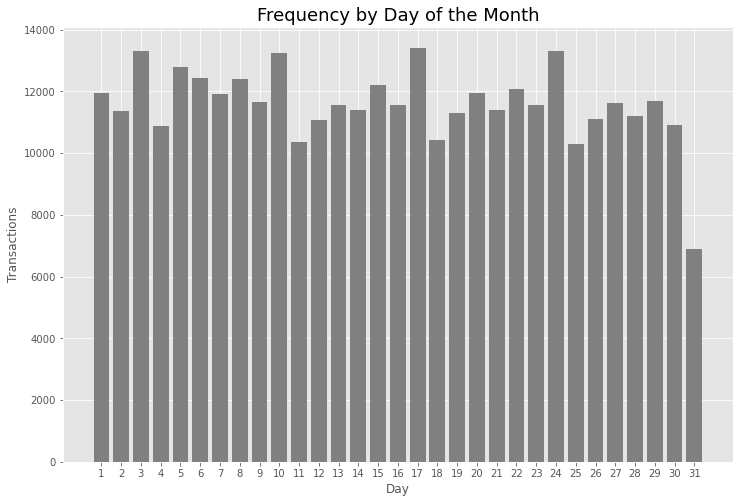

In [25]:
plt_data = df_cab_data.groupby(['Day']).Transaction_ID.count()
plt_data

plt.bar(plt_data.index, plt_data.values, color = 'gray')
plt.xticks(plt_data.index)
plt.title('Frequency by Day of the Month', fontsize = 18)
plt.xlabel('Day')
plt.ylabel('Transactions')

Text(0, 0.5, 'Transactions')

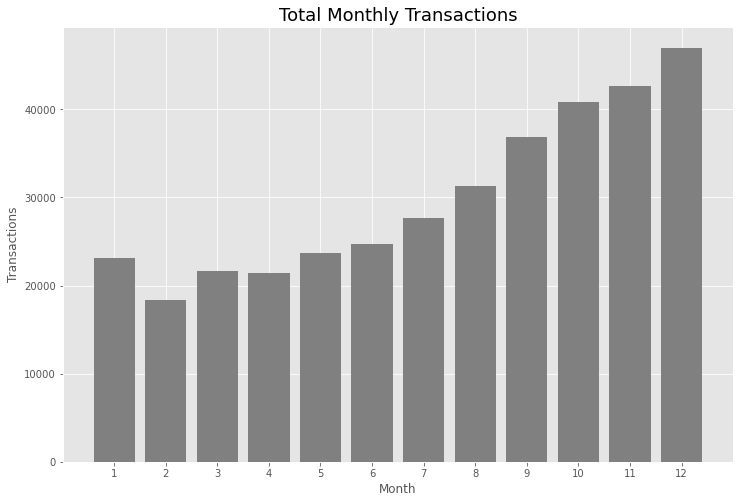

In [26]:
plt_data0 = df_cab_data.groupby(['Month']).Transaction_ID.count()
plt_data0

plt.bar(plt_data0.index, plt_data0.values, color = 'gray')
plt.xticks(plt_data0.index)
plt.title('Total Monthly Transactions', fontsize = 18)
plt.xlabel('Month')
plt.ylabel('Transactions')

Text(0, 0.5, 'Transactions')

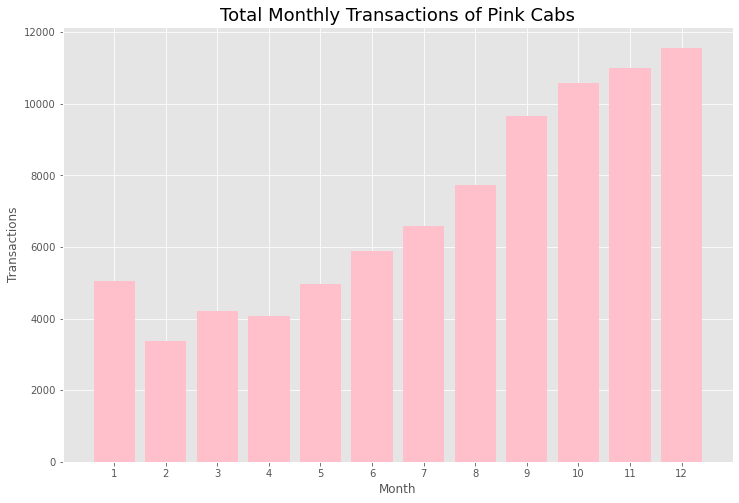

In [27]:
plt_data1 = df_pink_cab.groupby(['Month']).Transaction_ID.count()
plt_data1

plt.bar(plt_data1.index, plt_data1.values, color = "pink")
plt.xticks(plt_data1.index)
plt.title('Total Monthly Transactions of Pink Cabs', fontsize = 18)
plt.xlabel('Month')
plt.ylabel('Transactions')

Text(0, 0.5, 'Transactions')

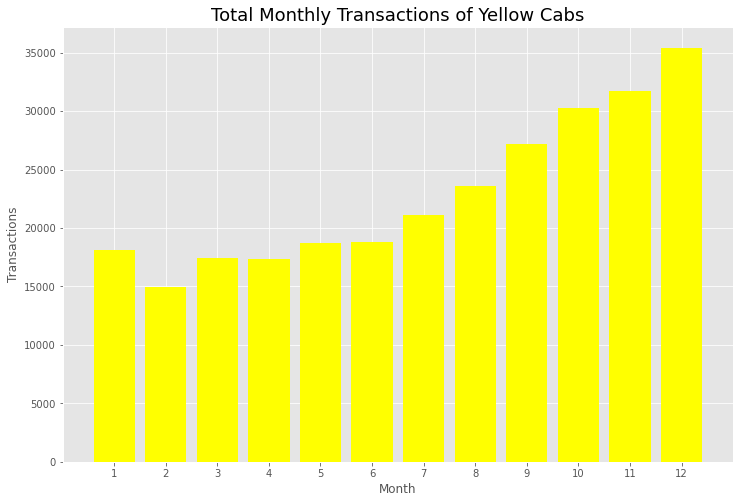

In [28]:
plt_data2 = df_yellow_cab.groupby(['Month']).Transaction_ID.count()
plt_data2

plt.bar(plt_data2.index, plt_data2.values, color = "yellow")
plt.xticks(plt_data2.index)
plt.title('Total Monthly Transactions of Yellow Cabs', fontsize = 18)
plt.xlabel('Month')
plt.ylabel('Transactions')

##### From the above graphs, February has the least transactions while December has the highest transactions. There is a trend of increasing transactions from February and peaks in December, while January has a lot less transactions. December's transactions are more then double of February. Looking at the two different cabs, Yellow Cab has noticeably many more transaction in all the months, at least double the transactions of Pink Cab.

### Distance Anaylsis

Text(0, 0.5, 'Frequence')

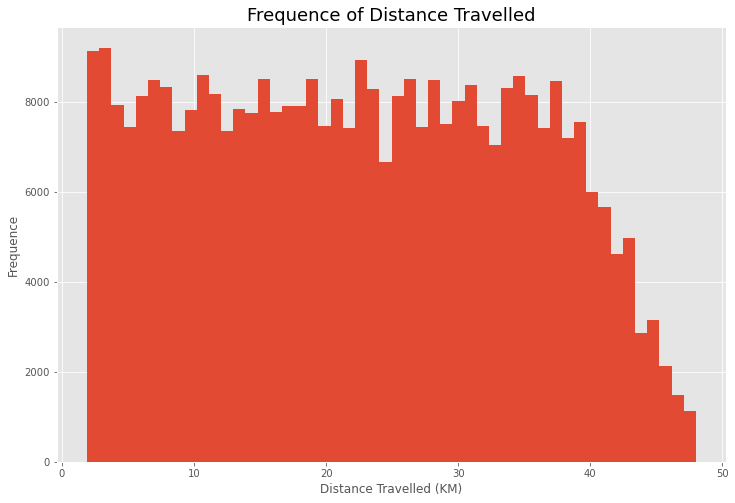

In [29]:
plt.hist(df_cab_data['KM_Travelled'], bins=50)
plt.title('Frequence of Distance Travelled', fontsize = 18)
plt.xlabel('Distance Travelled (KM)')
plt.ylabel('Frequence')

cab_data: Q1 = 12.0 and Q3 = 33.0
pink_cab: Q1 = 12.0 and Q3 = 33.0
yellow_cab: Q1 = 12.0 and Q3 = 33.0


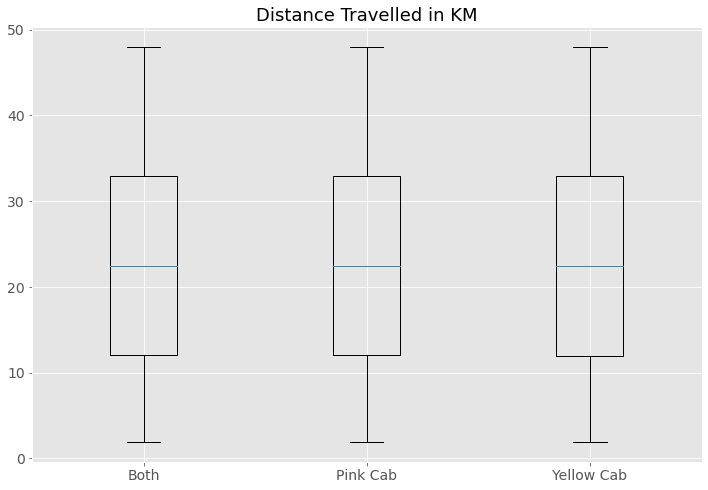

In [30]:
plt_data3 = [df_cab_data['KM_Travelled'], df_pink_cab['KM_Travelled'], df_yellow_cab['KM_Travelled']]

bp = plt.boxplot(plt_data3)
plt.title('Distance Travelled in KM', fontsize = 18)
plt.xticks([1, 2, 3], ['Both', 'Pink Cab', 'Yellow Cab'], fontsize = 14)
plt.yticks(fontsize = 14)

q1 = [round(min(item.get_ydata()), 1) for item in bp['boxes']]
q3 = [round(max(item.get_ydata()), 1) for item in bp['boxes']]

print('cab_data: Q1 = {} and Q3 = {}'.format(q1[0], q3[0]))
print('pink_cab: Q1 = {} and Q3 = {}'.format(q1[1], q3[1]))
print('yellow_cab: Q1 = {} and Q3 = {}'.format(q1[2], q3[2]))

##### Majoraty of the distance are from 12 KM to 33 KM.

### Profit per Year 

Year
2016    1713511.24
2017    2033655.03
2018    1560161.92
Name: Profit, dtype: float64


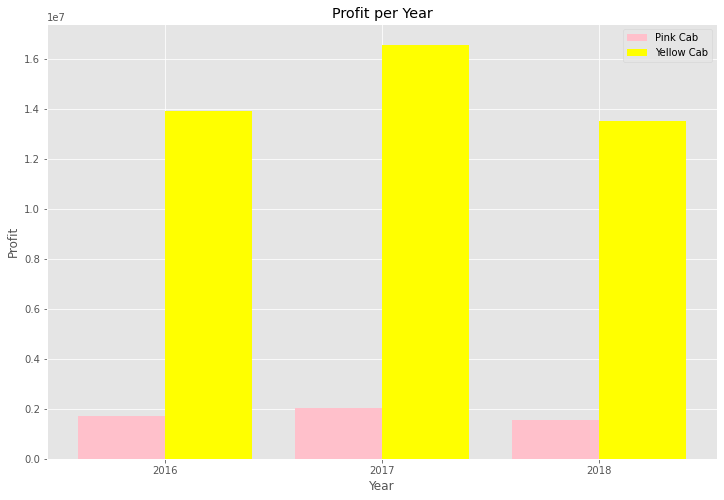

In [31]:
pink_profit = df_pink_cab.groupby(['Year']).Profit.sum()
yellow_profit = df_yellow_cab.groupby(['Year']).Profit.sum()
print(pink_profit)

X = ['2016','2017','2018']
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, pink_profit, 0.4, label = 'Pink Cab', color = "pink")
plt.bar(X_axis + 0.2, yellow_profit, 0.4, label = 'Yellow Cab', color = "yellow")
  
plt.xticks(X_axis, X)
plt.xlabel("Year")
plt.ylabel("Profit")
plt.title("Profit per Year")
plt.legend()
plt.show()


#### The graph above, shows the profit of both Cab company and the Yellow Cab is more profitable. The profit is the highest in 2017 followed by 2016 and 2018.

### Percentage of User in Each City

In [32]:
df_city['Percent_of_Users'] = df_city['Users']/ df_city['Population'] * 100
df_city

,City,Population,Users,Percent_of_Users
0,NEW YORK NY,8405837,302149,3.594514
1,CHICAGO IL,1955130,164468,8.412126
2,LOS ANGELES CA,1595037,144132,9.036279
3,MIAMI FL,1339155,17675,1.319862
4,SILICON VALLEY,1177609,27247,2.313756
...,...,...,...,...
15,SACRAMENTO CA,545776,7044,1.290639
16,PITTSBURGH PA,542085,3643,0.672035
17,WASHINGTON DC,418859,127001,30.320705
18,NASHVILLE TN,327225,9270,2.832913


Text(0, 0.5, 'Percent of Users')

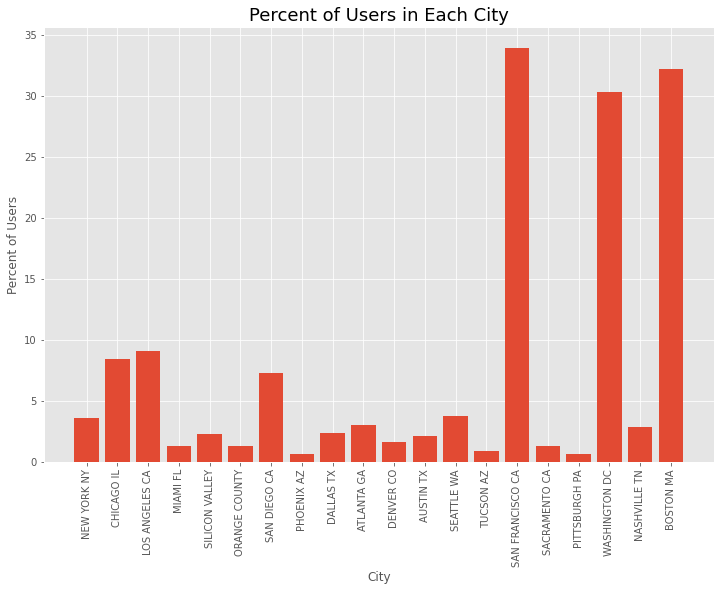

In [33]:
plt.bar(df_city['City'], df_city['Percent_of_Users'])
plt.xticks(df_city['City'], rotation = 90)
plt.title('Percent of Users in Each City', fontsize = 18)
plt.xlabel('City')
plt.ylabel('Percent of Users')

##### The percentage of users in San Francisco, Washington and Boston is the highest.

### Percentage of Transaction in Each City

Text(0.5, 1.0, 'Percentage of Transaction')

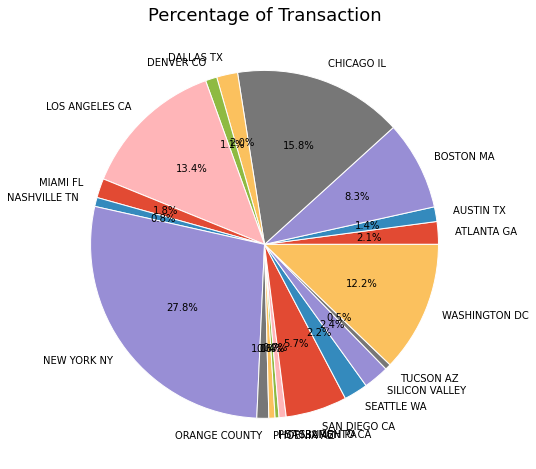

In [34]:
city_percent = df_cab_data.groupby('City').Transaction_ID.count()
city_percent

plt.pie(city_percent.values, labels = city_percent.index, autopct = '%.1f%%',
       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}) 
plt.title('Percentage of Transaction', fontsize=18)

##### New York has the highest over all percentage of transaction at 27.8%, followed by Chicago (15.8%), Los Angeles (13.4%) and Washington (12.2%).

Text(0.5, 1.0, 'Percentage of Transaction of Pink Cab')

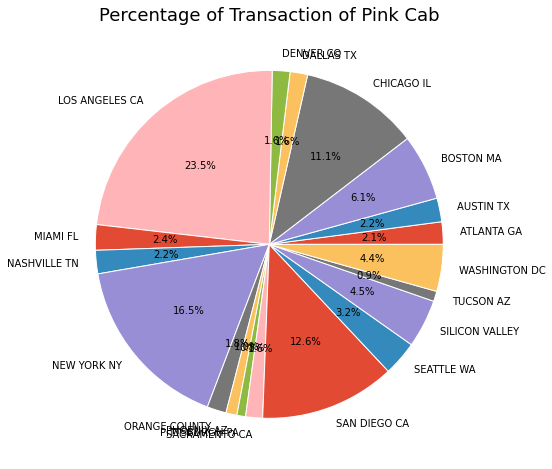

In [35]:
city_percent_pink = df_pink_cab.groupby('City').Transaction_ID.count()

plt.pie(city_percent_pink.values, labels = city_percent_pink.index, autopct = '%.1f%%',
       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}) 
plt.title('Percentage of Transaction of Pink Cab', fontsize=18)

Text(0.5, 1.0, 'Percentage of Transaction of Yellow Cab')

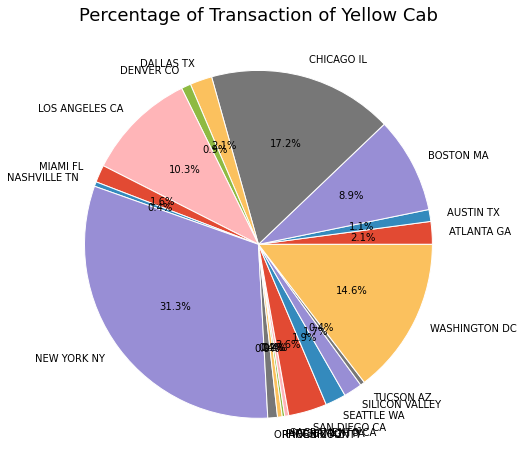

In [36]:
city_percent_yellow = df_yellow_cab.groupby('City').Transaction_ID.count()

plt.pie(city_percent_yellow.values, labels = city_percent_yellow.index, autopct = '%.1f%%',
       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}) 
plt.title('Percentage of Transaction of Yellow Cab', fontsize=18)

##### From the above graph, Pink Cab have more transactions in Los Angeles and San Diego. While Yellow have more transactions in New York, Chicago and Washington. By the looks of the graph, Pink Cab focuses on Los Angeles and Yellow focuses on New York.

## Combining All Dataframes

In [37]:
df_master = df_cab_data.join(df_transaction_id.set_index('Transaction_ID'), on='Transaction_ID')
df_master

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Day,Profit,Customer_ID,Payment_Mode
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.64,2016,1,8,57.31,29290,Card
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.85,2016,1,6,23.67,27703,Card
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.63,2016,1,2,27.57,28712,Cash
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.60,2016,1,7,25.80,28020,Cash
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.78,2016,1,3,16.84,27182,Card
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,2018,1,8,5.88,52392,Cash
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,2018,1,4,6.90,53286,Cash
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,2018,1,5,87.42,52265,Cash
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,2018,1,5,32.14,52175,Card


In [38]:
df_master = df_master.join(df_customer_id.set_index('Customer_ID'), on='Customer_ID')
df_master

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Day,Profit,Customer_ID,Payment_Mode,Gender,Age,Income
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.64,2016,1,8,57.31,29290,Card,Male,28,10813
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.85,2016,1,6,23.67,27703,Card,Male,27,9237
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.63,2016,1,2,27.57,28712,Cash,Male,53,11242
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.60,2016,1,7,25.80,28020,Cash,Male,23,23327
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.78,2016,1,3,16.84,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,2018,1,8,5.88,52392,Cash,Male,24,15651
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,2018,1,4,6.90,53286,Cash,Male,32,6528
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,2018,1,5,87.42,52265,Cash,Male,56,7966
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,2018,1,5,32.14,52175,Card,Male,32,6423


In [39]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction_ID  359392 non-null  int64  
 1   Company         359392 non-null  object 
 2   City            359392 non-null  object 
 3   KM_Travelled    359392 non-null  float64
 4   Price_Charged   359392 non-null  float64
 5   Cost_of_Trip    359392 non-null  float64
 6   Year            359392 non-null  int64  
 7   Month           359392 non-null  int64  
 8   Day             359392 non-null  int64  
 9   Profit          359392 non-null  float64
 10  Customer_ID     359392 non-null  int64  
 11  Payment_Mode    359392 non-null  object 
 12  Gender          359392 non-null  object 
 13  Age             359392 non-null  int64  
 14  Income          359392 non-null  int64  
dtypes: float64(4), int64(7), object(4)
memory usage: 43.9+ MB


In [40]:
for col in df_master.columns:
    missing_percent = np.mean(df_master[col].isnull())
    print('{} column is missing {}% data'.format(col, missing_percent))

Transaction_ID column is missing 0.0% data
Company column is missing 0.0% data
City column is missing 0.0% data
KM_Travelled column is missing 0.0% data
Price_Charged column is missing 0.0% data
Cost_of_Trip column is missing 0.0% data
Year column is missing 0.0% data
Month column is missing 0.0% data
Day column is missing 0.0% data
Profit column is missing 0.0% data
Customer_ID column is missing 0.0% data
Payment_Mode column is missing 0.0% data
Gender column is missing 0.0% data
Age column is missing 0.0% data
Income column is missing 0.0% data


### Age

(array([10846.,     0., 11591.,     0., 12229.,     0., 11431.,     0.,
        11796.,     0., 12327.,     0., 11151.,     0., 11973.,     0.,
            0., 11655.,     0., 12030.,     0., 11163.,     0., 10675.,
            0., 11165.,     0., 10930.,     0., 11959.,     0., 11457.,
            0.,     0., 11825.,     0., 10555.,     0., 11054.,     0.,
        11086.,     0., 10906.,     0., 11798.,     0., 11536.,     0.,
         3852.,     0.,     0.,  3970.,     0.,  3823.,     0.,  3725.,
            0.,  4248.,     0.,  3918.,     0.,  4087.,     0.,  3700.,
            0.,  4158.,     0.,     0.,  4089.,     0.,  3931.,     0.,
         3784.,     0.,  3641.,     0.,  3810.,     0.,  3442.,     0.,
         3742.,     0.,  3473.,     0.,     0.,  4107.,     0.,  4068.,
            0.,  3775.,     0.,  4361.,     0.,  3530.,     0.,  3733.,
            0.,  3908.,     0.,  3379.]),
 array([18.  , 18.47, 18.94, 19.41, 19.88, 20.35, 20.82, 21.29, 21.76,
        22.23, 22.7 , 2

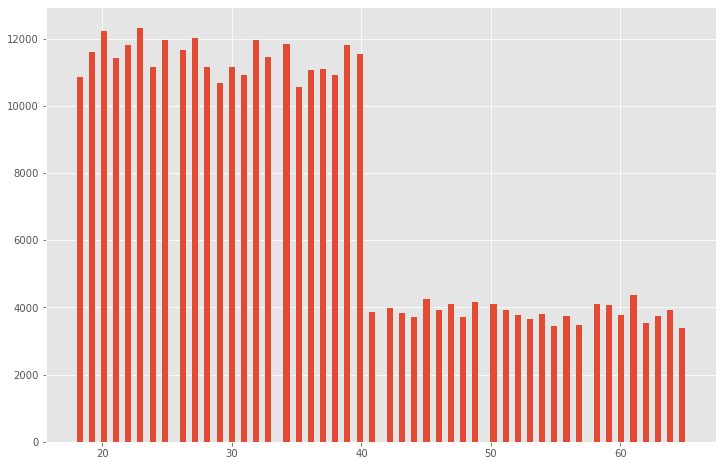

In [41]:
plt.hist(df_master['Age'], bins=100)

In [42]:
print('The min age is {} and the max age is {}.'.format(df_master['Age'].min(), df_master['Age'].max()))

The min age is 18 and the max age is 65.


##### The majority of the custumer is from age 18 to 40.

### Gender

Text(0.5, 1.0, 'Percentage of Gender')

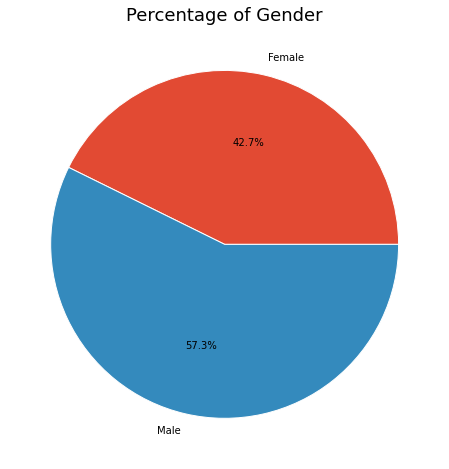

In [43]:
master_gender = df_master.groupby('Gender').Customer_ID.count()

plt.pie(master_gender.values, labels = master_gender.index, autopct = '%.1f%%',
       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}) 
plt.title('Percentage of Gender', fontsize=18)

Text(0.5, 1.0, 'Percentage of Gender of Pink Cab')

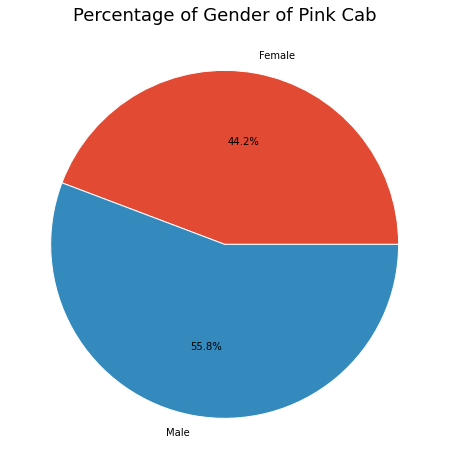

In [44]:
df_master_pink = df_master[df_master['Company'] == 'Pink Cab']
df_master_pink

master_gender_pink = df_master_pink.groupby('Gender').Customer_ID.count()

plt.pie(master_gender_pink.values, labels = master_gender_pink.index, autopct = '%.1f%%',
       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}) 
plt.title('Percentage of Gender of Pink Cab', fontsize=18)

Text(0.5, 1.0, 'Percentage of Gender of Yellow Cab')

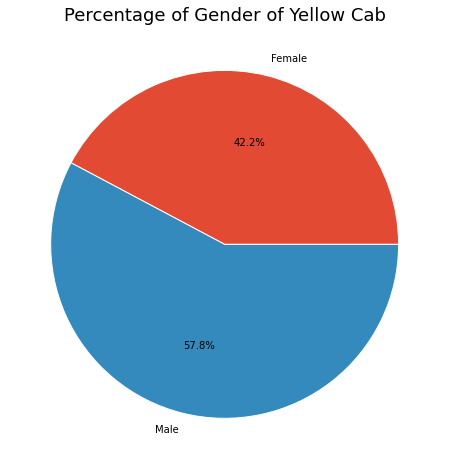

In [45]:
df_master_yellow = df_master[df_master['Company'] == 'Yellow Cab']
df_master_yellow

master_gender_yellow = df_master_yellow.groupby('Gender').Customer_ID.count()

plt.pie(master_gender_yellow.values, labels = master_gender_yellow.index, autopct = '%.1f%%',
       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}) 
plt.title('Percentage of Gender of Yellow Cab', fontsize=18)

##### There are more male then female that uses the cabs.

### Heatmap on the Master Dataset to Find Correlation

In [46]:
corr_matrix = df_master[['Profit', 'Price_Charged', 'Cost_of_Trip', 'KM_Travelled', 'Age', 'Income']].corr(method = 'pearson')
corr_matrix

,Profit,Price_Charged,Cost_of_Trip,KM_Travelled,Age,Income
Profit,1.000000,0.864154,0.486056,0.462768,-0.005093,0.006148
Price_Charged,0.864154,1.000000,0.859812,0.835753,-0.003084,0.003228
Cost_of_Trip,0.486056,0.859812,1.000000,0.981848,-0.000189,-0.000633
KM_Travelled,0.462768,0.835753,0.981848,1.000000,-0.000369,-0.000544
Age,-0.005093,-0.003084,-0.000189,-0.000369,1.000000,0.003907
Income,0.006148,0.003228,-0.000633,-0.000544,0.003907,1.000000


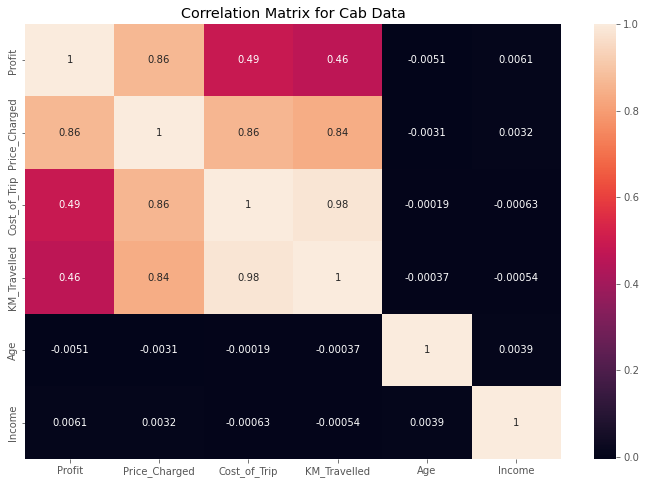

In [47]:
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Cab Data')
plt.show()

##### From the above heatmap, there is a big correlation between profit & price charged. There are also good correlation between Profit & Cost of Trip and Profit & KM Travelled

Text(0.5, 1.0, 'Yellow Cab')

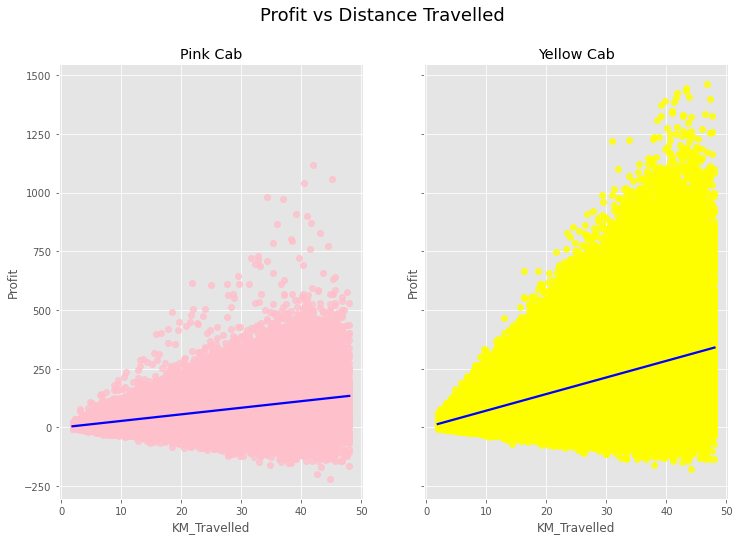

In [48]:
fig, ax =plt.subplots(1,2, sharey = True)
sns.regplot(x='KM_Travelled', y='Profit', data=df_master_pink, color = 'pink', line_kws={'color':'blue'}, ax=ax[0])
sns.regplot(x='KM_Travelled', y='Profit', data=df_master_yellow, color = 'yellow', line_kws={'color':'blue'}, ax=ax[1])
fig.suptitle('Profit vs Distance Travelled', fontsize = 18)
ax[0].set_title('Pink Cab')
ax[1].set_title('Yellow Cab')

##### There is increase profit when increase in distance travelled for both company, but Yellow Cab have a higher correlation.

Text(0.5, 1.0, 'Yellow Cab')

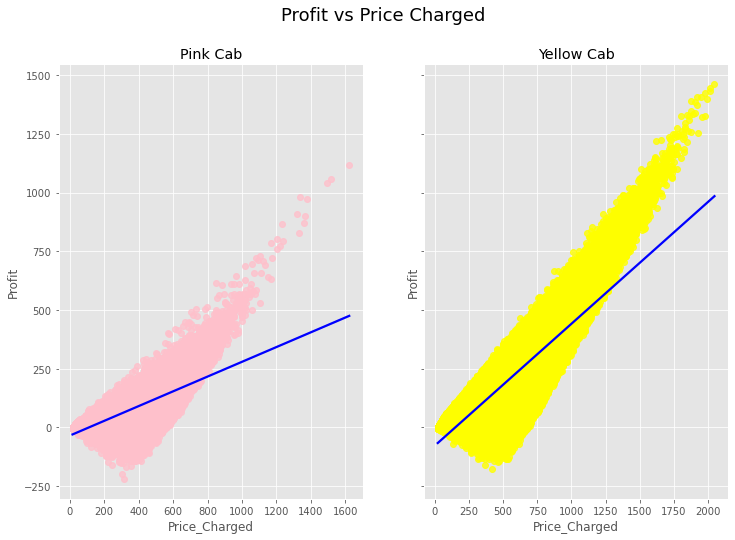

In [49]:
fig, ax =plt.subplots(1,2, sharey = True)
sns.regplot(x='Price_Charged', y='Profit', data=df_master_pink, color = 'pink', line_kws={'color':'blue'}, ax=ax[0])
sns.regplot(x='Price_Charged', y='Profit', data=df_master_yellow, color = 'yellow', line_kws={'color':'blue'}, ax=ax[1])
fig.suptitle('Profit vs Price Charged', fontsize = 18)
ax[0].set_title('Pink Cab')
ax[1].set_title('Yellow Cab')

##### There is increase profit when increase in price charged for both company, but Yellow Cab have a higher correlation.

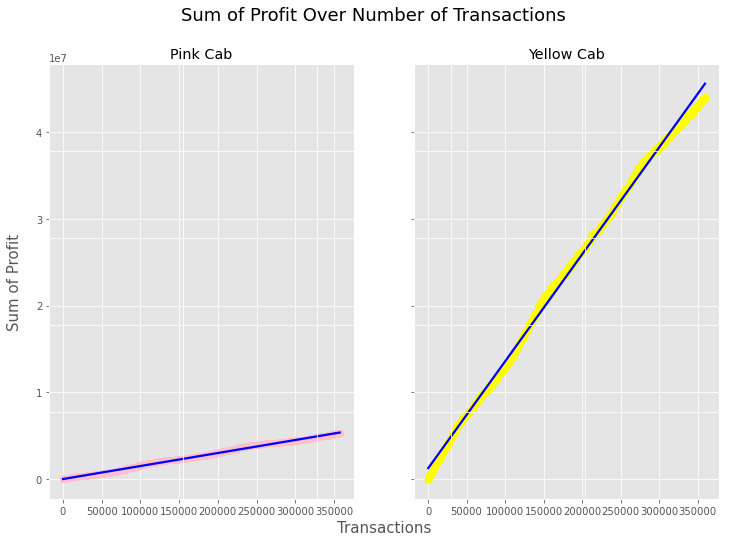

In [50]:
prof_pink = df_master_pink['Profit'].cumsum()
prof_yellow = df_master_yellow['Profit'].cumsum()

fig, ax =plt.subplots(1,2, sharey = True)
sns.regplot(x=prof_pink.index, y=prof_pink.values,  color = 'pink', line_kws={'color':'blue'}, ax=ax[0])
sns.regplot(x=prof_yellow.index, y=prof_yellow.values,  color = 'yellow', line_kws={'color':'blue'}, ax=ax[1])
fig.suptitle('Sum of Profit Over Number of Transactions', fontsize = 18)
ax[0].set_title('Pink Cab')
ax[1].set_title('Yellow Cab')

# Adding a plot in the figure which will encapsulate all the subplots with axis showing only
fig.add_subplot(1, 1, 1, frame_on=False)

# Hiding the axis ticks and tick labels of the bigger plot
plt.tick_params(labelcolor="none", bottom=False, left=False)

# Adding the x-axis and y-axis labels for the bigger plot
plt.xlabel('Transactions', fontsize=15)
plt.ylabel('Sum of Profit', fontsize=15)

plt.show()

##### From the graph above, the profit of the Yellow Cab increase more with increasing transactions then Pink Cab.